In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import datetime
from datetime import timedelta
import statsmodels.api as sm

In [ ]:
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'casestudy')
drive.mount(MOUNTPOINT)
dirPath = os.getcwd()
print(dirPath)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
# Load data
data = pd.read_excel(dirPath+'/gdrive/My Drive/casestudy/execution_details.xlsx')

##Data Quality Check

In [ ]:
data

,exec_ID,start_time,total,run_time,pass,no_run,fail
0,8CDEE20B07F934A9_333,Jan 04_2016 $ 15:03:27.160,2.0,74999,2,0,0
1,53FD937E7AF5F7C8_801,Jan 04_2016 $ 07:21:51.640,27.0,494716,27,0,0
2,D88FE21F8CE4C782_413,Jan 04_2016 $ 07:45:26.305,51.0,1158015,51,0,0
3,5D98E08C167B86D7_129,Jan 04_2016 $ 07:50:05.194,23.0,261737,23,0,0
4,A244CB7FA3DD2DBF_704,Jan 04_2016 $ 08:22:45.660,4.0,130560,4,0,0
...,...,...,...,...,...,...,...
56182,A7744FEC5ECB187E_910,Jan 28_2018 $ 19:45:23.478,45.0,138134,1,0,44
56183,D032BCBA1DBA1772_728,Jan 28_2018 $ 19:37:06.396,45.0,126941,0,1,44
56184,F5CA74CA79E8E0AC_183,Jan 28_2018 $ 19:31:33.996,16.0,294136,0,16,0
56185,2E507508A8564E21_689,Jan 28_2018 $ 19:27:31.865,45.0,140578,0,1,44


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56187 entries, 0 to 56186
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exec_ID     56187 non-null  object 
 1   start_time  56187 non-null  object 
 2   total       56169 non-null  float64
 3   run_time    56187 non-null  object 
 4   pass        56187 non-null  int64  
 5   no_run      56187 non-null  int64  
 6   fail        56187 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.0+ MB


We can see that the run_time feature is an object, let us convert it to float.

In [ ]:
data['run_time'] = data['run_time'].apply(lambda x: str(x).replace(',','')).astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56187 entries, 0 to 56186
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exec_ID     56187 non-null  object 
 1   start_time  56187 non-null  object 
 2   total       56169 non-null  float64
 3   run_time    56187 non-null  float64
 4   pass        56187 non-null  int64  
 5   no_run      56187 non-null  int64  
 6   fail        56187 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


Check for any empty values.

In [ ]:
np.where(data.applymap(lambda x : x =='\s+'))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(data.applymap(lambda x : x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(data.isnull())

(array([   31, 14217, 14551, 16921, 24187, 26271, 35426, 40458, 40484,
        40534, 40570, 40583, 40611, 40676, 40712, 40746, 46130, 51614]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

We seem to have null values in the 'total' feature. Let us explore it.

In [ ]:
data[data['total'].isnull()]

,exec_ID,start_time,total,run_time,pass,no_run,fail
31,DD71ECF6E1030EB3_334,Jan 04_2016 $ 11:56:47.102,NaN,266395.0,11,0,3
14217,1D050DAE9FF7AD8D_804,Jun 12_2016 $ 05:19:18.189,NaN,182852.0,3,0,0
14551,F37663B688060438_006,Jun 05_2016 $ 07:05:42.062,NaN,424764.0,24,0,0
16921,4614FB56E346EC36_141,Oct 30_2016 $ 20:02:25.883,NaN,23131229.0,161,0,17
24187,13E26F23E067DE27_602,Feb 10_2017 $ 20:52:02.843,NaN,311222.0,3,0,0
26271,B5C307E58AB7308E_454,Mar 06_2017 $ 04:31:18.478,NaN,925400.0,16,0,0
35426,FB100024B3FB2767_238,Jun 15_2017 $ 02:26:30.996,NaN,602044.0,46,0,0
40458,AF28E1CBC9E9B8A5_760,Aug 04_2017 $ 20:10:01.179,NaN,273187.0,0,0,14
40484,4E97C9E8D1BA100D_289,Aug 05_2017 $ 03:48:03.056,NaN,1670052.0,94,0,3
40534,14C7A1378842D9E7_674,Aug 05_2017 $ 15:59:55.920,NaN,664914.0,103,0,2


In [ ]:
data.loc[(data['total']!=0) &(data['pass']!=0)&(data['fail']!=0)&(data['no_run']!=0),['total','pass','fail','no_run']]

,total,pass,fail,no_run
58,80.0,18,2,60
94,28.0,12,6,10
176,132.0,63,4,65
200,70.0,2,4,64
202,137.0,3,7,127
...,...,...,...,...
56074,312.0,2,308,2
56078,209.0,2,205,2
56102,93.0,2,89,2
56150,209.0,2,205,2


Total column is the sum of Pass tests, Fail tests and Not run tests count. So we will impute the missing values in tot column with the sum of these three columns

In [ ]:
data.loc[data['total'].isnull(),'total']  = data['pass']+data['fail']+data['no_run']

In [ ]:
np.where(data.isnull())

(array([], dtype=int64), array([], dtype=int64))

Missing values have been successfully imputed.

Verify the total feature.

In [ ]:
data['check'] = data['pass']+data['fail']+data['no_run']

In [ ]:
data[data['total']!=data['check']]

,exec_ID,start_time,total,run_time,pass,no_run,fail,check
9,FC630923FDCB238D_590,Jan 04_2016 $ 09:07:14.835,5.0,98148.0,3,0,0,3
1186,54E413381C2FFDE4_875,Jan 24_2016 $ 11:23:26.593,51.0,2691257.0,48,0,4,52
1243,0BF97AE84B4125CF_018,Jan 25_2016 $ 09:38:04.308,256.0,2642338.0,84,168,6,258
4167,01F01A00696D7BAA_223,Apr 15_2016 $ 08:17:04.028,23.0,528834.0,25,0,0,25
7386,EC16F6E673AEE0FB_911,Sep 24_2016 $ 11:25:15.637,41.0,908253.0,40,0,0,40
8814,6780217019591B0B_315,Sep 04_2016 $ 04:14:50.430,26.0,798674.0,30,0,0,30
15407,5EF9236E5A1E1390_310,Nov 21_2016 $ 08:25:09.290,16.0,321940.0,17,0,0,17
15478,6F9C9A31BEC45616_901,Nov 20_2016 $ 09:37:54.618,4.0,130202.0,3,0,0,3
29459,62EBFA5DD1664800_011,Apr 08_2017 $ 21:03:48.526,20.0,1013511.0,19,0,0,19
29490,7D0A80798F57D06E_914,Apr 09_2017 $ 05:20:52.287,143.0,4387950.0,146,2,2,150


We see that the total feature in the above cases, is not the sum of pass, fail and not run test cases. Let us fix that.

In [ ]:
data.loc[data['total']!=data['check'], ['total']] = data['check']

In [ ]:
data[data['total']!=data['check']]['exec_ID'].count()

0

In [ ]:
data.drop(columns='check', axis=1, inplace=True)

We need to convert the start_time feature to date-time format.

In [ ]:
data['start_time'] = pd.to_datetime(data['start_time'], format = '%b %d_%Y $ %H:%M:%S.%f')

In [ ]:
data.head()

,exec_ID,start_time,total,run_time,pass,no_run,fail
0,8CDEE20B07F934A9_333,2016-01-04 15:03:27.160,2.0,74999.0,2,0,0
1,53FD937E7AF5F7C8_801,2016-01-04 07:21:51.640,27.0,494716.0,27,0,0
2,D88FE21F8CE4C782_413,2016-01-04 07:45:26.305,51.0,1158015.0,51,0,0
3,5D98E08C167B86D7_129,2016-01-04 07:50:05.194,23.0,261737.0,23,0,0
4,A244CB7FA3DD2DBF_704,2016-01-04 08:22:45.660,4.0,130560.0,4,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56187 entries, 0 to 56186
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   exec_ID     56187 non-null  object        
 1   start_time  56187 non-null  datetime64[ns]
 2   total       56187 non-null  float64       
 3   run_time    56187 non-null  float64       
 4   pass        56187 non-null  int64         
 5   no_run      56187 non-null  int64         
 6   fail        56187 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
data[data['exec_ID'].duplicated()]

,exec_ID,start_time,total,run_time,pass,no_run,fail


exec_ID - is a unique ID for each test-execution. We would not need this info for modelling. We can remove this.

In [ ]:
data.drop(columns='exec_ID', axis=1, inplace=True)

In [ ]:
data

,start_time,total,run_time,pass,no_run,fail
0,2016-01-04 15:03:27.160,2.0,74999.0,2,0,0
1,2016-01-04 07:21:51.640,27.0,494716.0,27,0,0
2,2016-01-04 07:45:26.305,51.0,1158015.0,51,0,0
3,2016-01-04 07:50:05.194,23.0,261737.0,23,0,0
4,2016-01-04 08:22:45.660,4.0,130560.0,4,0,0
...,...,...,...,...,...,...
56182,2018-01-28 19:45:23.478,45.0,138134.0,1,0,44
56183,2018-01-28 19:37:06.396,45.0,126941.0,0,1,44
56184,2018-01-28 19:31:33.996,16.0,294136.0,0,16,0
56185,2018-01-28 19:27:31.865,45.0,140578.0,0,1,44


## Time Bin

We will aggregate the above data for a time bin of 1 day. It would make sense to have execution details per day - for the given business problem.

We will add a new feature to track the number of execution-runs per day.

In [ ]:
data['exec_count'] = 1

In [ ]:
data

,start_time,total,run_time,pass,no_run,fail,exec_count
0,2016-01-04 15:03:27.160,2.0,74999.0,2,0,0,1
1,2016-01-04 07:21:51.640,27.0,494716.0,27,0,0,1
2,2016-01-04 07:45:26.305,51.0,1158015.0,51,0,0,1
3,2016-01-04 07:50:05.194,23.0,261737.0,23,0,0,1
4,2016-01-04 08:22:45.660,4.0,130560.0,4,0,0,1
...,...,...,...,...,...,...,...
56182,2018-01-28 19:45:23.478,45.0,138134.0,1,0,44,1
56183,2018-01-28 19:37:06.396,45.0,126941.0,0,1,44,1
56184,2018-01-28 19:31:33.996,16.0,294136.0,0,16,0,1
56185,2018-01-28 19:27:31.865,45.0,140578.0,0,1,44,1


Let us group by day and set the date as index.

In [ ]:
df = data.set_index('start_time')
df = df.resample('D').sum()

In [ ]:
len(df)

759

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 759 entries, 2016-01-04 to 2018-01-31
Freq: D
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total       759 non-null    float64
 1   run_time    759 non-null    float64
 2   pass        759 non-null    int64  
 3   no_run      759 non-null    int64  
 4   fail        759 non-null    int64  
 5   exec_count  759 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.5 KB


In [ ]:
df.describe()

,total,run_time,pass,no_run,fail,exec_count
count,759.000000,7.590000e+02,759.000000,759.000000,759.000000,759.000000
mean,2910.927536,8.757441e+07,1919.317523,675.837945,315.772069,74.027668
std,2250.128062,7.552522e+07,1147.960660,1335.617539,425.705241,32.162976
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1396.000000,3.612797e+07,1127.500000,50.000000,70.000000,56.000000
50%,2439.000000,8.134535e+07,1842.000000,195.000000,173.000000,77.000000
75%,3854.500000,1.120760e+08,2548.000000,813.500000,383.000000,95.000000
max,25068.000000,6.443511e+08,7147.000000,19549.000000,3485.000000,153.000000


In [ ]:
df[df['run_time']==0].count()

total         47
run_time      47
pass          47
no_run        47
fail          47
exec_count    47
dtype: int64

We can see that the run time is zero for about 47 days in the series. Let us explore it further.

In [ ]:
df[df['run_time']==0]

,total,run_time,pass,no_run,fail,exec_count
start_time,,,,,,
2016-02-19,0.0,0.0,0,0,0,0
2016-02-20,0.0,0.0,0,0,0,0
2016-02-21,0.0,0.0,0,0,0,0
2016-02-22,0.0,0.0,0,0,0,0
2016-02-23,0.0,0.0,0,0,0,0
2016-02-24,0.0,0.0,0,0,0,0
2016-02-25,0.0,0.0,0,0,0,0
2016-02-26,0.0,0.0,0,0,0,0
2016-02-27,0.0,0.0,0,0,0,0


Clearly a contigous block of data is missing from 19-Feb to 15-March ie. for 26 days. This is likely some missing data as it is a single stretch of days.

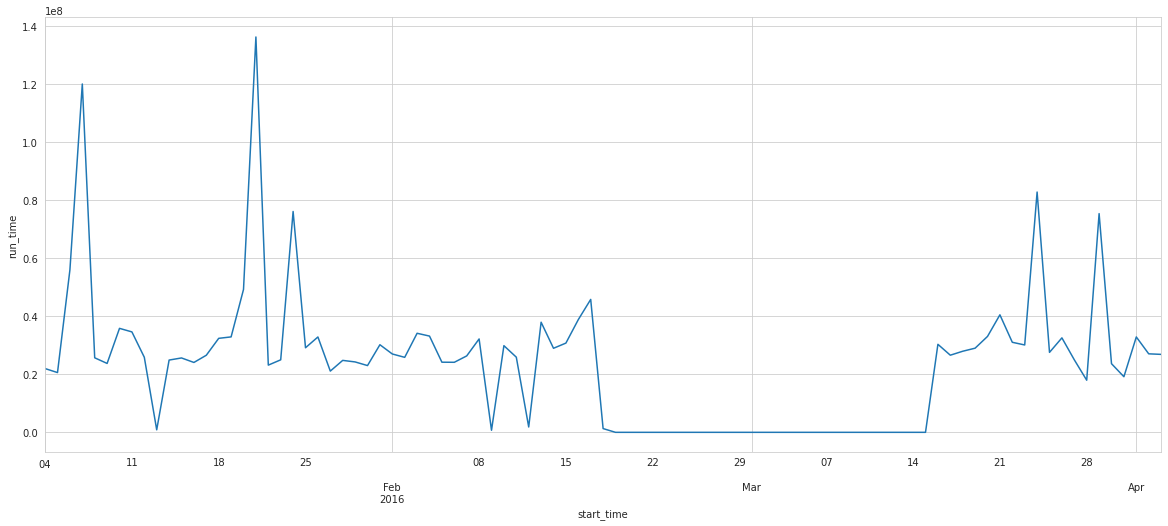

In [ ]:
plt.subplots(figsize=(20,8))
df[(df.index >='2016-01-04') & (df.index <='2016-04-03')]['run_time'].plot() 
plt.ylabel('run_time')
plt.show()

To fill these missing values, we will use an average of the historical window of 26 days and the future window of 26 days.

In [ ]:
def getDateRange(date_s, date_e):
  date_s = datetime.datetime.strptime(date_s, format('%Y-%m-%d'))
  date_e = datetime.datetime.strptime(date_e, format('%Y-%m-%d'))
  days_wind = (date_e - date_s).days +1
  startdate = date_s  - timedelta(days=days_wind)
  enddate = date_e  + timedelta(days=days_wind)
  return startdate, enddate

def missingMeans(date_s, date_e, startdate, enddate):
  meanSeries = pd.concat([df[(df.index >=startdate) & (df.index <date_s)], df[(df.index > date_e) & (df.index <= enddate)]], axis=0).mean()
  run_time = np.round(meanSeries['run_time'])
  passed = np.round(meanSeries['pass'])
  notRun = np.round(meanSeries['no_run'])
  failed = np.round(meanSeries['fail'])
  execCount = np.round(meanSeries['exec_count'])
  tot = passed + notRun + failed
  return run_time, tot, passed, failed, notRun, execCount

def meanImputer(date_s, date_e):
  startdate, enddate = getDateRange(date_s, date_e)
  run_time, tot, passed, failed, notRun, execCount = missingMeans(date_s, date_e, startdate, enddate)
  return run_time, tot, passed, failed, notRun, execCount


In [ ]:
date_s, date_e = '2016-02-19', '2016-03-15'
run_time, tot, passed, failed, notRun, execCount = meanImputer(date_s, date_e)

In [ ]:
df.loc[(df.index >=date_s) & (df.index <=date_e), ['run_time','total','pass','fail','no_run','exec_count']] = run_time, tot, passed, failed, notRun, execCount

In [ ]:
df.loc[(df.index >=date_s) & (df.index <=date_e), ['run_time','total','pass','fail','no_run','exec_count']]

,run_time,total,pass,fail,no_run,exec_count
start_time,,,,,,
2016-02-19,31016331.0,1772.0,1118,184,470,53
2016-02-20,31016331.0,1772.0,1118,184,470,53
2016-02-21,31016331.0,1772.0,1118,184,470,53
2016-02-22,31016331.0,1772.0,1118,184,470,53
2016-02-23,31016331.0,1772.0,1118,184,470,53
2016-02-24,31016331.0,1772.0,1118,184,470,53
2016-02-25,31016331.0,1772.0,1118,184,470,53
2016-02-26,31016331.0,1772.0,1118,184,470,53
2016-02-27,31016331.0,1772.0,1118,184,470,53


Missing values imputed successfully! - Similarly we will do for other missing values.

In [ ]:
df[df['run_time']==0]

,total,run_time,pass,no_run,fail,exec_count
start_time,,,,,,
2016-04-28,0.0,0.0,0,0,0,0
2016-04-29,0.0,0.0,0,0,0,0
2016-05-20,0.0,0.0,0,0,0,0
2016-05-21,0.0,0.0,0,0,0,0
2016-05-26,0.0,0.0,0,0,0,0
2016-05-27,0.0,0.0,0,0,0,0
2016-05-28,0.0,0.0,0,0,0,0
2016-05-29,0.0,0.0,0,0,0,0
2016-05-30,0.0,0.0,0,0,0,0


In [ ]:
dateList = [('2016-04-28','2016-04-29'),('2016-05-20','2016-05-21'),('2016-05-26','2016-05-30'),
            ('2016-07-01','2016-07-02'),('2016-07-08','2016-07-08'),('2016-07-20','2016-07-20'),
            ('2016-08-20','2016-08-20'),('2016-11-05','2016-11-05'),('2017-05-25','2017-05-27'),
            ('2017-11-02','2017-11-04')]

In [ ]:
for dt in dateList:
  date_s, date_e = dt[0], dt[1]
  run_time, tot, passed, failed, notRun, execCount = meanImputer(date_s, date_e)
  df.loc[(df.index >=date_s) & (df.index <=date_e), ['run_time','total','pass','fail','no_run','exec_count']] = run_time, tot, passed, failed, notRun, execCount

In [ ]:
df[df['run_time']==0]

,total,run_time,pass,no_run,fail,exec_count
start_time,,,,,,


We have filled in all missing daily execution records. Below is an example of the imputed time interval.

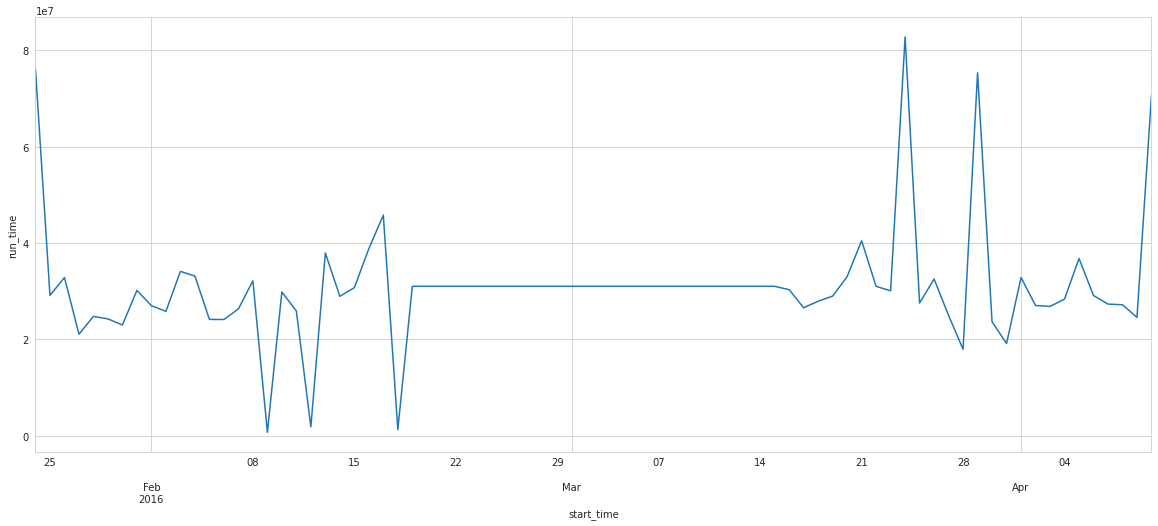

In [ ]:
plt.subplots(figsize=(20,8))
df[(df.index >='2016-01-24') & (df.index <='2016-04-10')]['run_time'].plot() 
plt.ylabel('run_time')
plt.show()

The run time values are no more zeros here but the average of the historical and future time windows of the missing days period.

In [ ]:
print(df.index.min())
print(df.index.max())
print((df.index.max() - df.index.min()).days+1)

2016-01-04 00:00:00
2018-01-31 00:00:00
759


We have automation tests execution data for 759 days starting from Jan 2016 to Jan 2018.

Let us convert runtimes in milliseconds to hours. This would make it easier to visualize and interpret

In [ ]:
df['run_time'] = df['run_time']/(1000*60*60)

Let us get a quick snapshot of the features with respect to time.

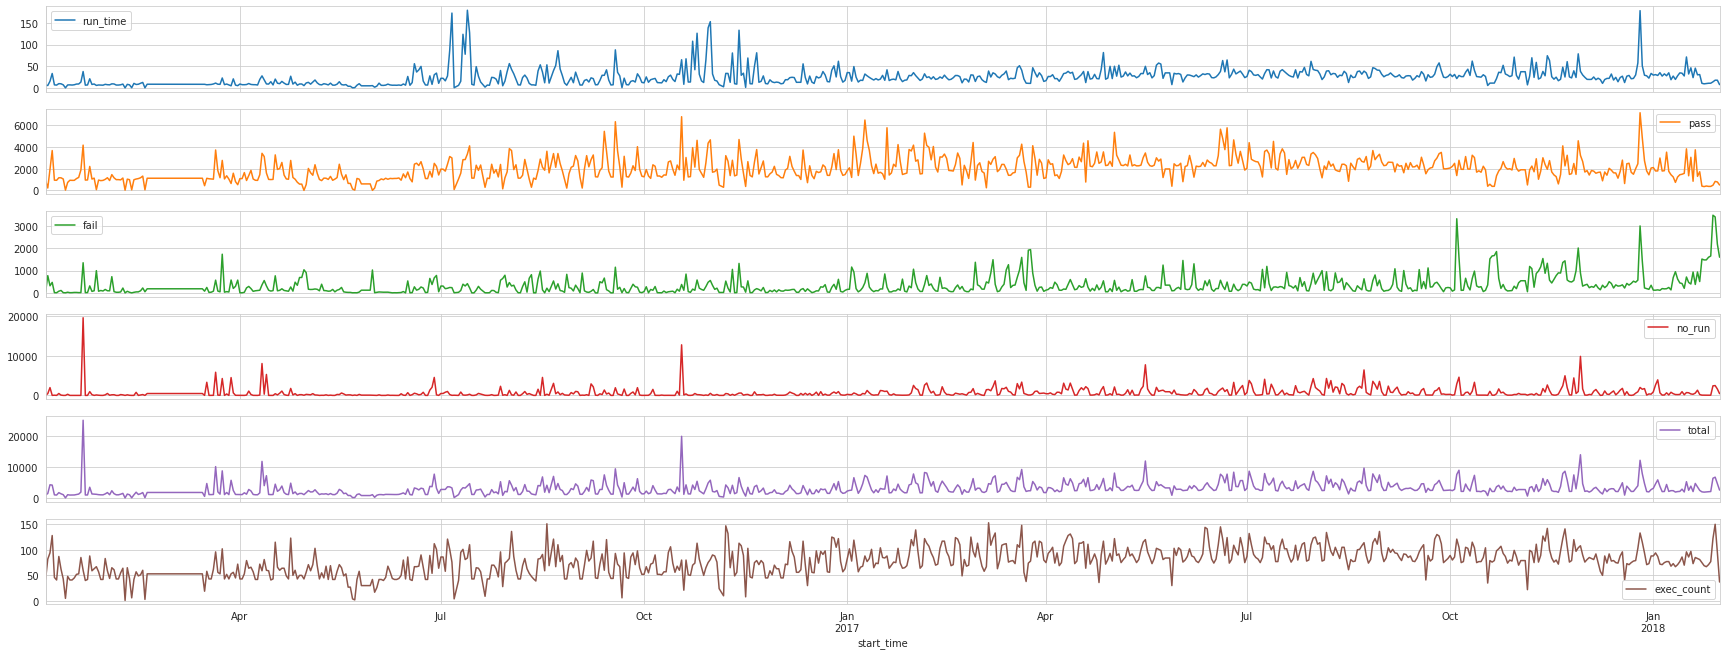

In [ ]:
df[['run_time','pass','fail','no_run','total','exec_count']].plot(subplots=True, figsize=(30,11))
plt.show()

1. Till the mid of June 2016, we see that the runtimes are steady. They begin to fluctuate visibly after that.
2. We see a few extreme outliers in the runtimes.
3. There is no obvious trend or seasonality in the features - they seem stationary from the above plot.
4. Run time seems to have a high correlation with the Passes. Since the passed test cases, actually mean the full execution was completed successfully, it is understandable, that these contribute to an increase in the run time.
5. The execution count ie. the no. of executions triggered per day doesnt seem to show any distinct patterns/ changes to patterns. It averages around 75 per day.

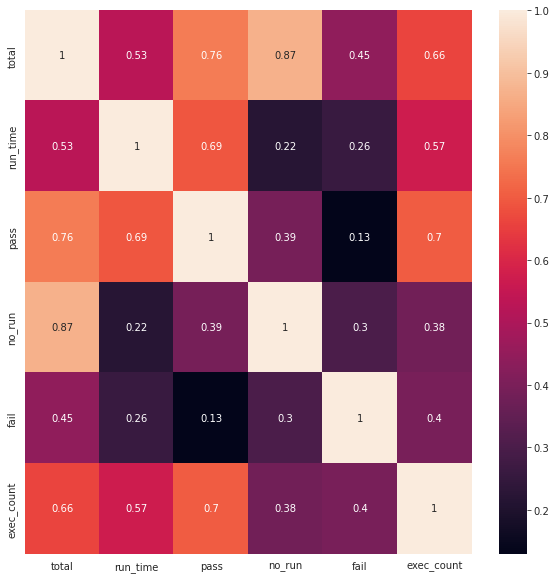

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

The correlation between runtime and passed tests is on the higher side when compared to other correlations with runtime.

<Figure size 1440x1440 with 0 Axes>

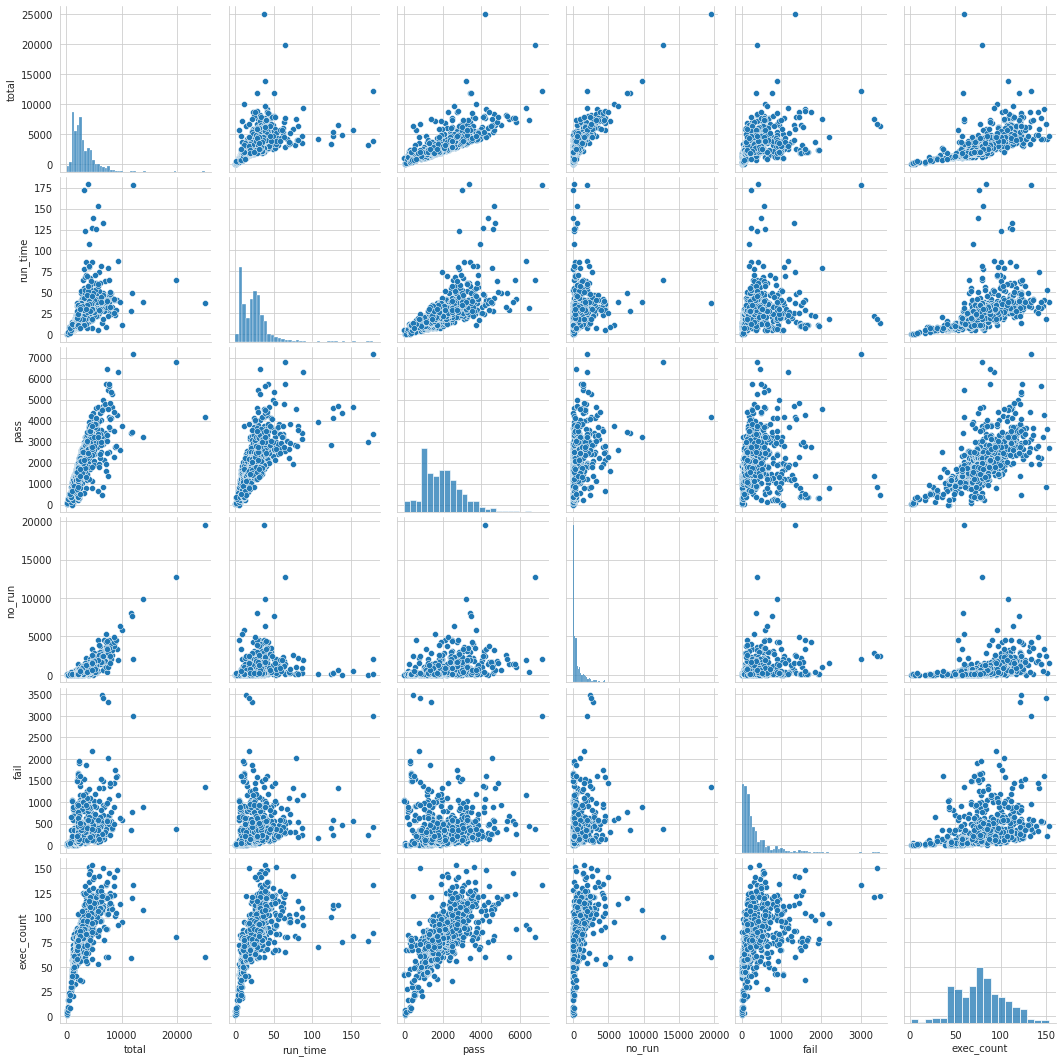

In [ ]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid");
sns.pairplot(df, palette='icefire')
plt.show()

Pass and Exec_count have good correlation to the Run times.

No Runs seem to influence the runtimes to the least.

Let us explore the other features.

In [ ]:
dftest = df.copy()

Let us engineer a few features to see their effects on run times.

In [ ]:
dftest['passRate'] = dftest['pass']/dftest['total']
dftest['failRate'] = dftest['fail']/dftest['total']
dftest['norunRate'] = dftest['no_run']/dftest['total']

In [ ]:
dftest.drop(columns=['total','pass','fail','no_run'], axis=1, inplace=True)

In [ ]:
dftest.head()

,run_time,exec_count,passRate,failRate,norunRate
start_time,,,,,
2016-01-04,6.098808,42,0.953320,0.044606,0.002075
2016-01-05,5.716791,82,0.151978,0.536433,0.311589
2016-01-06,15.538374,94,0.464412,0.074935,0.460653
2016-01-07,33.325904,128,0.883558,0.113790,0.002652
2016-01-08,7.131022,46,0.939122,0.010978,0.049900


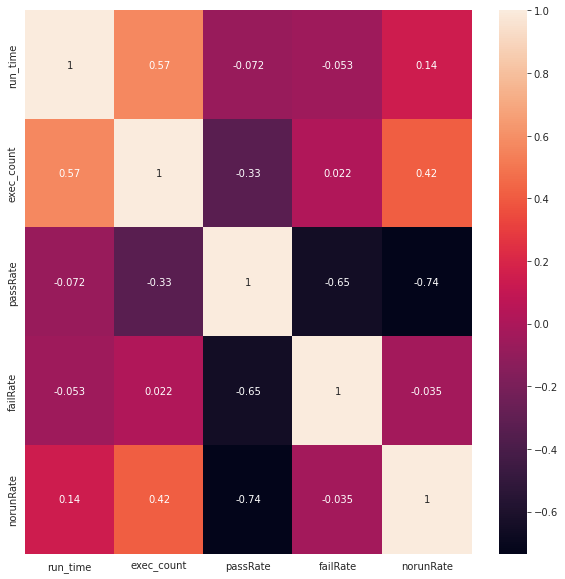

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(dftest.corr(), annot=True)
plt.show()

The passrate seems to have a very low negative correlation to the run_time feature.

<Figure size 1440x1440 with 0 Axes>

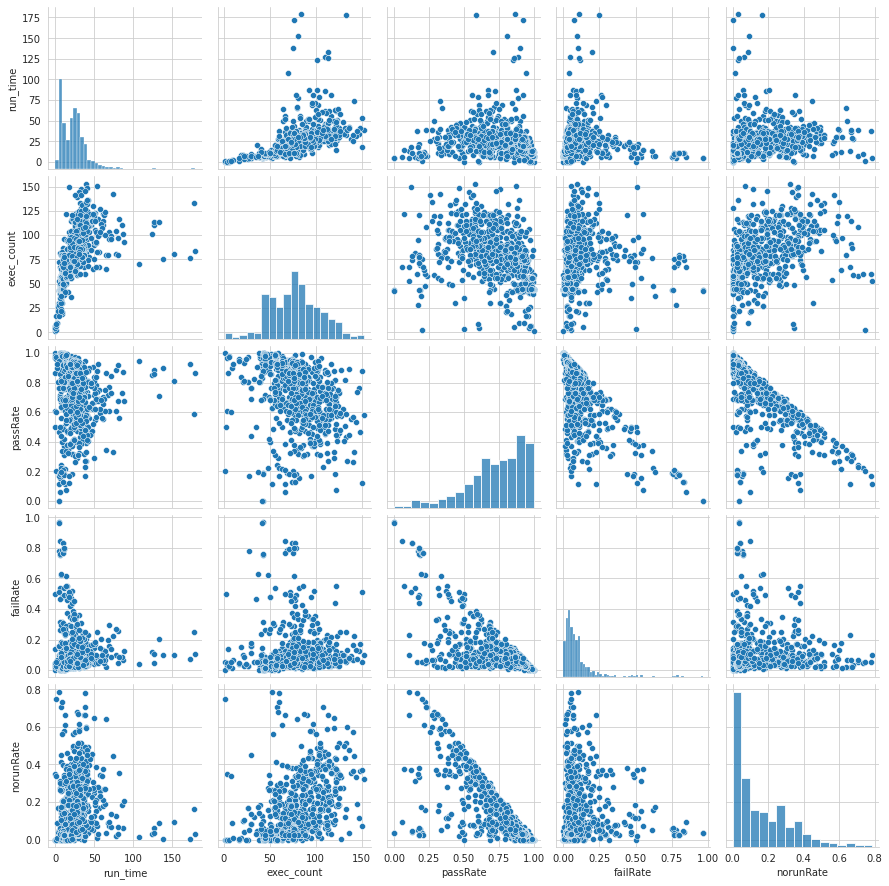

In [ ]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid");
sns.pairplot(dftest, palette='icefire')
plt.show()

It is likely that the passrate which is a combination of Passed and Total is reducing the influence on runtimes. We had seen that while Passed had a higher correlation to runtimes, Total feature was lesser. 

We can infer that the absolute pass, fail and no run features would work better than the respective percentages.

In [ ]:
df.head()

,total,run_time,pass,no_run,fail,exec_count
start_time,,,,,,
2016-01-04,964.0,6.098808,919,2,43,42
2016-01-05,1441.0,5.716791,219,449,773,82
2016-01-06,4257.0,15.538374,1977,1961,319,94
2016-01-07,4148.0,33.325904,3665,11,472,128
2016-01-08,1002.0,7.131022,941,50,11,46


####SKEWNESS AND KURTOSIS

In [ ]:
df.corr()['run_time'].sort_values(ascending=False)

run_time      1.000000
pass          0.693182
exec_count    0.570670
total         0.528268
fail          0.260696
no_run        0.218446
Name: run_time, dtype: float64

In [ ]:
df.skew().sort_values(ascending=False)

no_run        6.383695
run_time      3.244243
fail          3.175352
total         3.106370
pass          1.020363
exec_count    0.029834
dtype: float64

In [ ]:
df.kurt().sort_values(ascending=False)

no_run        67.436915
total         20.614083
run_time      17.324334
fail          14.808138
pass           2.005107
exec_count    -0.039612
dtype: float64

'Pass' and 'Exec_Count' have highest correlation with 'run_time'. Both of these do not have a high skew/Kurtosis value - Indicating we do not have high number of outliers with these two features.

RUN TIME

In [ ]:
df.run_time.describe()

count    759.000000
mean      25.087219
std       20.446254
min        0.198032
25%       10.628175
50%       22.881914
75%       31.637309
max      178.986426
Name: run_time, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


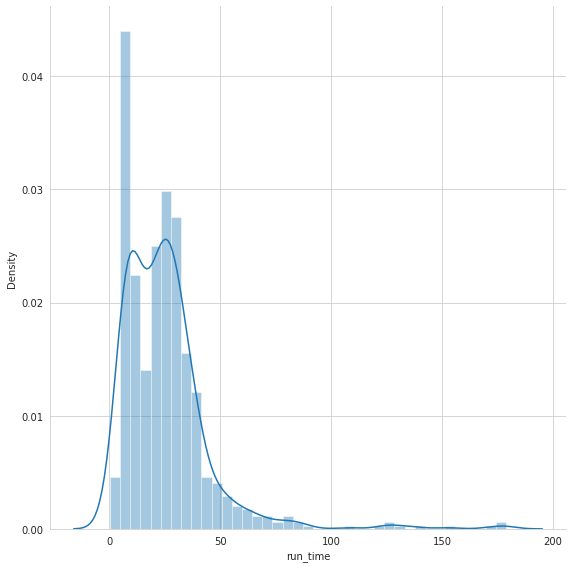

In [ ]:
sns.FacetGrid(df,height=8).map(sns.distplot,'run_time').add_legend()
plt.show()

The peak/mean is around 25 hours runtime. The distribution seems right skewed, there seem to be outliers in the runtime feature.

Also, 100 can be a good cut-off to label anomalies.

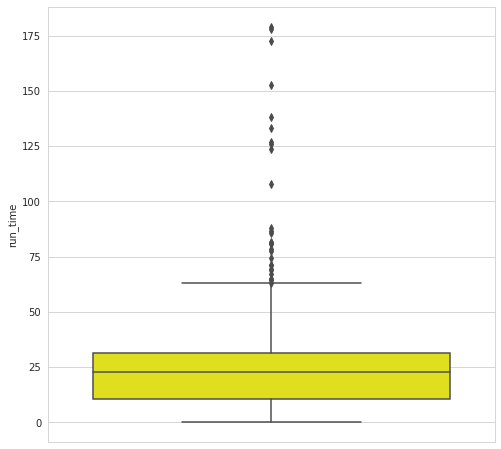

In [ ]:
plt.subplots(figsize=(8,8))
sns.boxplot(y='run_time', data=df, color='yellow')
plt.show()

In [ ]:
df[df['run_time']>65].count()

total         24
run_time      24
pass          24
no_run        24
fail          24
exec_count    24
dtype: int64

Test executions running beyond 65 hours are shown as outliers in the above plot. However, it is possible that these outliers are there for a reason - which we must account for. For instance any timeouts, app down time during test execution etc.

We have 24 such entries

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


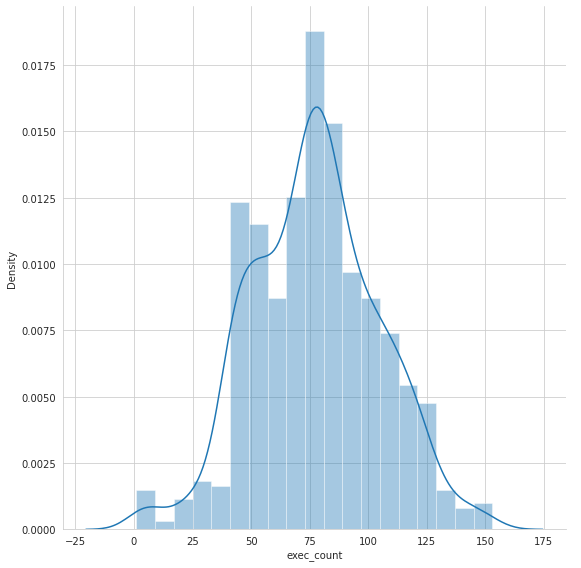

In [ ]:
sns.FacetGrid(df,height=8).map(sns.distplot,'exec_count').add_legend()
plt.show()

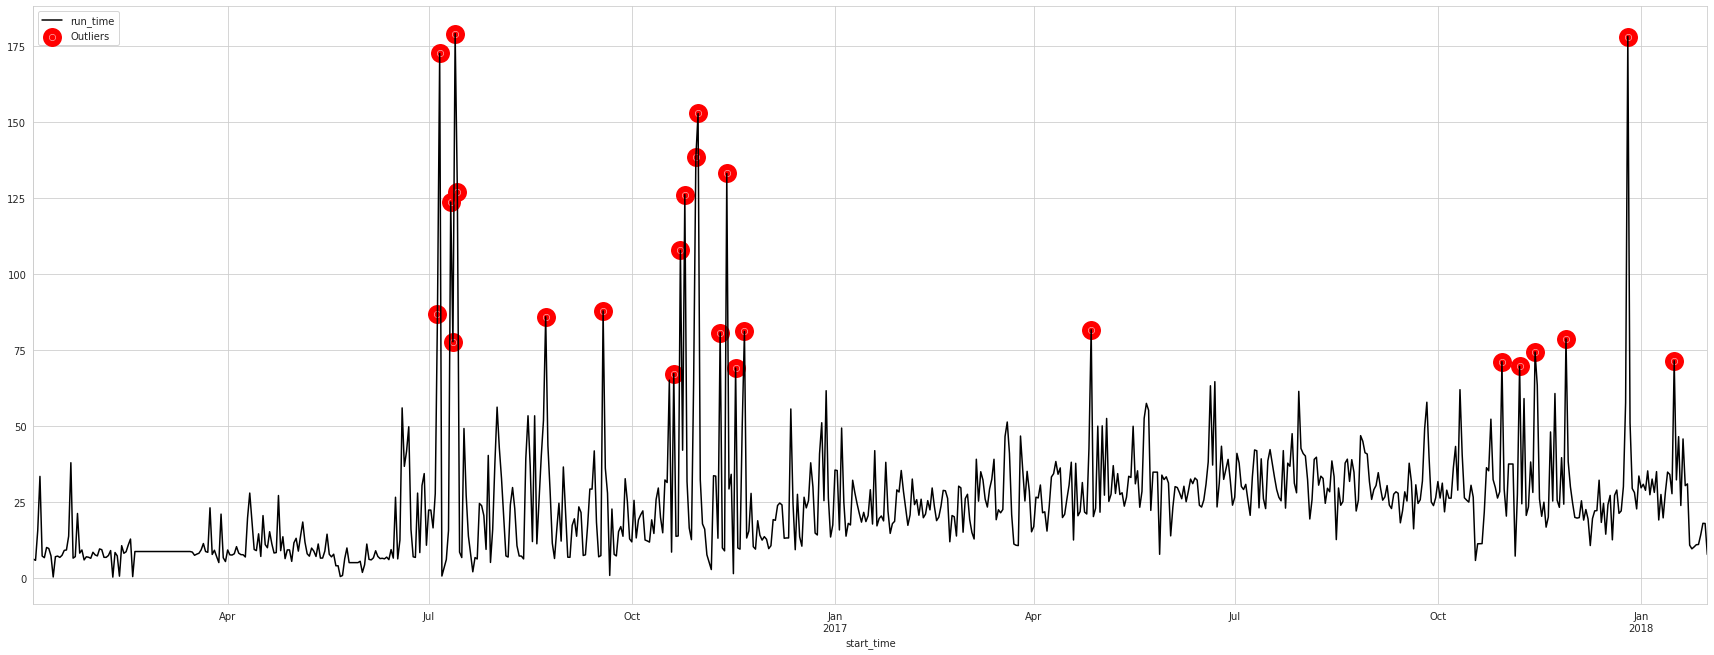

In [ ]:
df['run_time'].plot(figsize=(30,11),color='black')
plt.scatter(x= df[df['run_time']>65].index, y= df[df['run_time']>65]['run_time'],color='red', label = 'Outliers',linewidths=13)
plt.legend()
plt.show()

We can see that outlier instances have comedown as the time series progressed. 

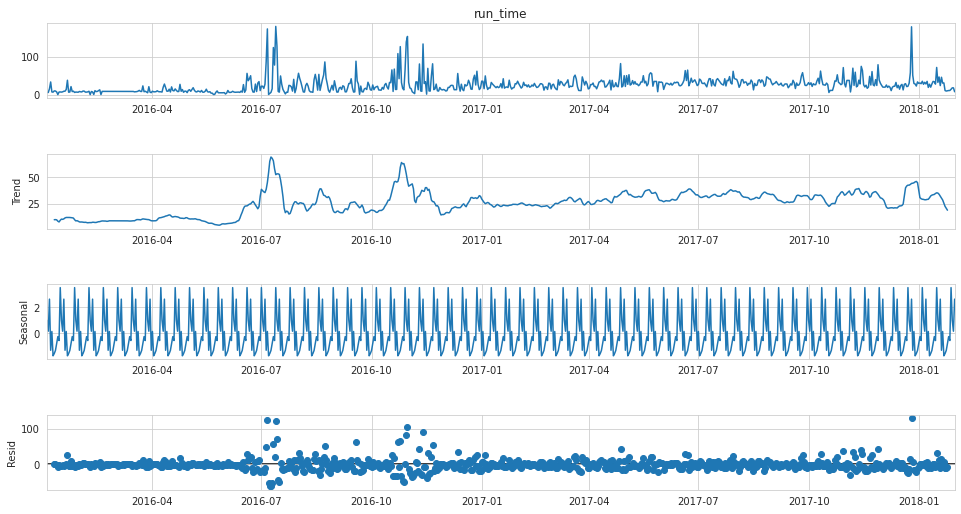

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df.run_time, period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

From 2017, there are no drastic changes to the trend, centering around 35 hours. The Residue plot, clearly shows outliers in the second half of 2016.

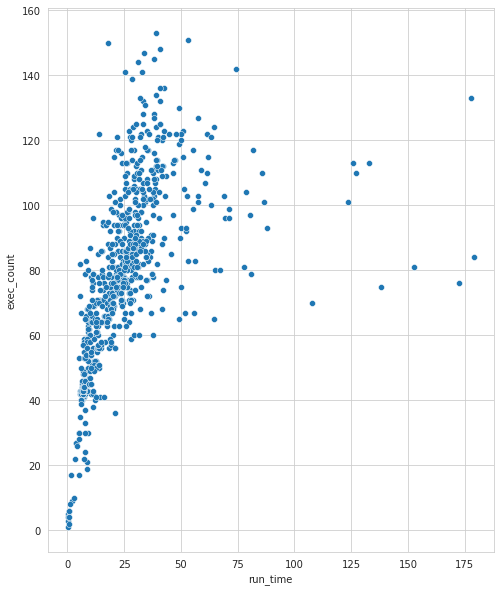

In [ ]:
plt.subplots(figsize=(8,10))
sns.scatterplot(x='run_time',y='exec_count',data=df)
plt.show()

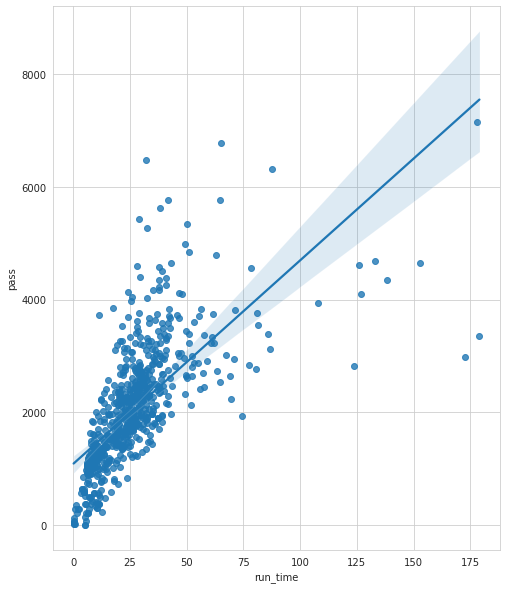

In [ ]:
plt.subplots(figsize=(8,10))
sns.regplot(x='run_time', y='pass', data=df)
plt.show()

There is linear relationship between runtime, exec_count and pass - understandbly. The more the tests pass, the more the tests fully run and hence more the runtime. Simlarly, more the executions per day, the run times are more likely to be higher.

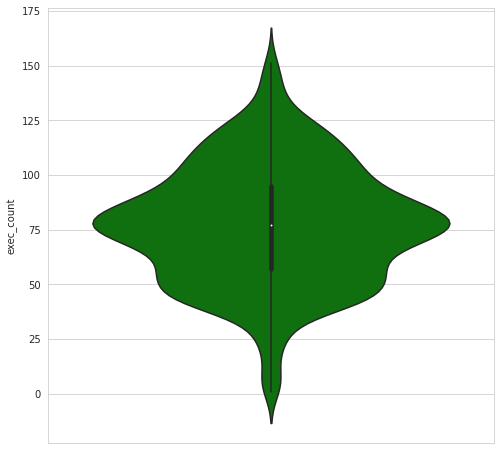

In [ ]:
plt.subplots(figsize=(8,8))
sns.violinplot(y='exec_count', data=df, color='green')
plt.show()

Execution count, seems to center around 75 executions per day. This feature, doesnt seem to have an outlier problem.

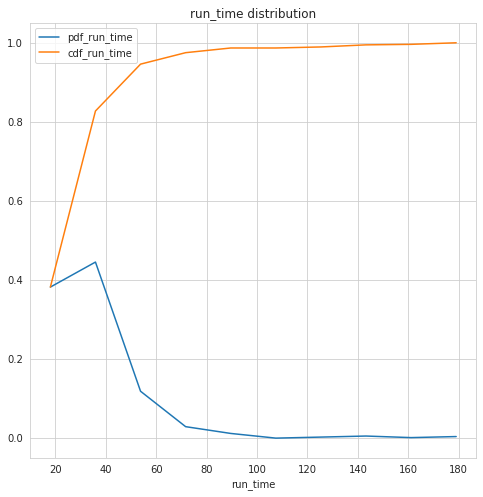

In [ ]:
plt.subplots(figsize=(8,8))
counts, bin_edges = np.histogram(df['run_time'],bins=10,density=True)
pdf = counts/sum(counts)
plt.plot(bin_edges[1:],pdf,label= 'pdf_run_time')
counts, bin_edges = np.histogram(df['run_time'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label= 'cdf_run_time')
plt.title("run_time distribution")
plt.xlabel('run_time')
plt.legend()
plt.show()

Around 95% of the run_times are  below 60 hours. About 45% of the daily executions have a run time of 35 hours.

In [ ]:
df

,total,run_time,pass,no_run,fail,exec_count
start_time,,,,,,
2016-01-04,964.0,6.098808,919,2,43,42
2016-01-05,1441.0,5.716791,219,449,773,82
2016-01-06,4257.0,15.538374,1977,1961,319,94
2016-01-07,4148.0,33.325904,3665,11,472,128
2016-01-08,1002.0,7.131022,941,50,11,46
...,...,...,...,...,...,...
2018-01-27,2074.0,10.934531,367,52,1655,77
2018-01-28,6363.0,14.067379,474,2404,3485,122
2018-01-29,6706.0,17.891077,825,2473,3408,150


### Summary

At the end of EDA we see that:

1. Run time feature doesn't have any obvious seasonality. There is slight increase in the average run time as the time progresses. Otherwise it is visibly stationary.

2. There are around 25 outliers and possibly a few anomalies within these 25 entries.

3. Pass and Execution Count features influence the runtimes.

4. The feature, we had engineered - Execution Count, seems to track the runtimes well.

5. The Pass rate, fail rate and No run rate, features we experimented with, influenced the runtimes, to a lesser extent than the absolute values - hence were dropped.

6. We had imputed missing values, in the run time using averages from preceding and succeeding time windows.

In [ ]:
# Save dataset
df.to_excel(dirPath+'/gdrive/My Drive/casestudy/dfseries.xlsx',index=True)

Continued in part 2..